In [1]:
import os
# print(os.listdir("your-local-director../data/"))

print(os.listdir("/Users/liqinyuan/Desktop/Tutorials/Intelligent-Systems-COS30018/Week7/5-celebrity-faces-dataset/data/"))


['.DS_Store', 'train', 'val']


In [2]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

2023-08-30 20:54:34.807654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


0.1.0


In [3]:
import numpy as np
from PIL import Image

# load image from file
file_path = "/Users/liqinyuan/Desktop/Tutorials/Intelligent-Systems-COS30018/Week7/5-celebrity-faces-dataset/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg"
image = Image.open(file_path)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = np.asarray(image)

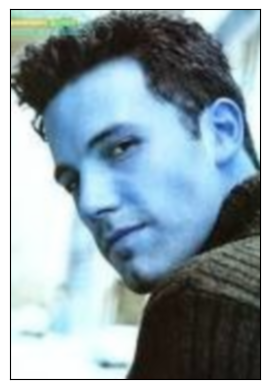

(170, 115, 3)


In [4]:
import cv2 # opencv
from matplotlib import pyplot as plt

img = cv2.imread(file_path)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

In [5]:
from mtcnn import MTCNN

# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(pixels)

print(results)
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
# bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height
# extract the face
face = pixels[y1:y2, x1:x2] 

1/1 [==============================] - 0s 111ms/step
[{'box': [14, 27, 80, 95], 'confidence': 0.9999995231628418, 'keypoints': {'left_eye': (28, 74), 'right_eye': (53, 61), 'nose': (38, 90), 'mouth_left': (45, 109), 'mouth_right': (65, 98)}}]


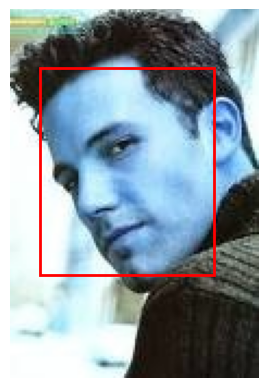

In [6]:
import matplotlib.patches as patches

# Display the image
plt.imshow(cv2.cvtColor(pixels, cv2.COLOR_BGR2RGB))

# Plot the bounding boxes
for result in results:
    x, y, w, h = result['box']
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

# Set plot limits to show the entire image with bounding boxes
plt.xlim(0, pixels.shape[1])
plt.ylim(pixels.shape[0], 0)

plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [7]:
# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = np.asarray(image)

1/1 [==============================] - 0s 111ms/step


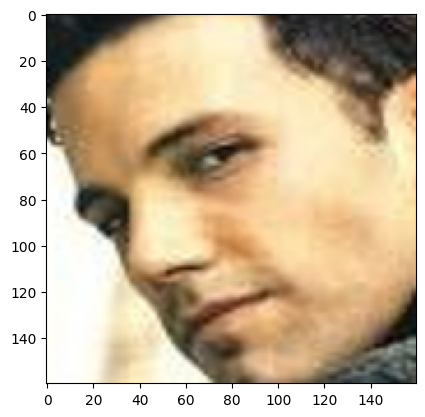

(160, 160, 3)


In [8]:
from numpy import asarray

# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('/Users/liqinyuan/Desktop/Tutorials/Intelligent-Systems-COS30018/Week7/5-celebrity-faces-dataset/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)




1/1 [==============================] - 0s 113ms/step
1 (160, 160, 3)
1/1 [==============================] - 0s 107ms/step
2 (160, 160, 3)
1/1 [==============================] - 0s 104ms/step
3 (160, 160, 3)
1/1 [==============================] - 0s 138ms/step
4 (160, 160, 3)
1/1 [==============================] - 0s 121ms/step
5 (160, 160, 3)
1/1 [==============================] - 0s 121ms/step
6 (160, 160, 3)
1/1 [==============================] - 0s 147ms/step
7 (160, 160, 3)
1/1 [==============================] - 0s 169ms/step
8 (160, 160, 3)
1/1 [==============================] - 0s 106ms/step
9 (160, 160, 3)
1/1 [==============================] - 0s 106ms/step
10 (160, 160, 3)
1/1 [==============================] - 0s 116ms/step
11 (160, 160, 3)
1/1 [==============================] - 0s 109ms/step
12 (160, 160, 3)
1/1 [==============================] - 0s 104ms/step
13 (160, 160, 3)
1/1 [==============================] - 0s 105ms/step
14 (160, 160, 3)


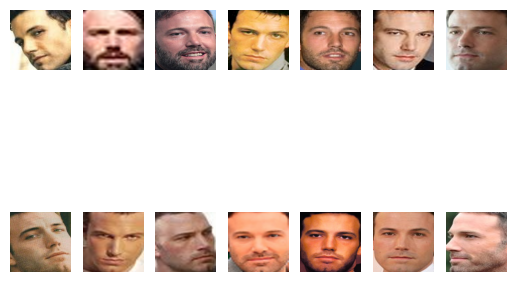

In [9]:
from os import listdir

# specify folder to plot
# folder = 'your directory../ben_afflek/'
folder = '/Users/liqinyuan/Desktop/Tutorials/Intelligent-Systems-COS30018/Week7/5-celebrity-faces-dataset/data/train/ben_afflek/'
i = 1
# enumerate files
for filename in listdir(folder):
    # path
    path = folder + filename
    # get face
    face = extract_face(path)
    print(i, face.shape)
    # plot
    plt.subplot(2, 7, i)
    plt.axis('off')
    plt.imshow(face)
    i += 1
plt.show()




In [10]:
from os.path import isdir

# load images and extract faces for all images in a directory
def load_faces(directory):
    faces = list()
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        # get face
        face = extract_face(path)
        # store
        faces.append(face)
    return faces


In [11]:
def load_dataset(directory):
    X, y = list(), list()
    # enumerate folders, on per class
    for subdir in listdir(directory):
        # path
        path = directory + subdir + '/'
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        # load all faces in the subdirectory
        faces = load_faces(path)
        # create labels
        labels = [subdir for _ in range(len(faces))]
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        # store
        X.extend(faces)
        y.extend(labels)
    return asarray(X), asarray(y)

In [ ]:
from numpy import savez_compressed

# load train dataset
trainX, trainy = load_dataset('/Users/liqinyuan/Desktop/Tutorials/Intelligent-Systems-COS30018/Week7/5-celebrity-faces-dataset/data/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/Users/liqinyuan/Desktop/Tutorials/Intelligent-Systems-COS30018/Week7/5-celebrity-faces-dataset/data/val/')
print(testX.shape, testy.shape)
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

1/1 [==============================] - 0s 99ms/step
>loaded 14 examples for class: ben_afflek
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 114ms/step
>loaded 19 examples for class: madonna


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 99ms/step
>loaded 17 examples for class: elton_john
1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 106ms/step
>loaded 22 examples for class: mindy_kaling
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 116ms/step


In [ ]:
import keras
print("Keras version:", keras.__version__)

In [ ]:
# example of loading the keras facenet model
from keras_facenet import FaceNet

facenet_model = FaceNet()
print('Loaded Model')

In [ ]:
# get the face embedding for one face
def get_embedding(model, face_pixels):
    # scale pixel values
    face_pixels = face_pixels.astype('float32')
    # transform face into one sample
    sample = np.expand_dims(face_pixels, axis=0)
    # get embedding vector
    yhat = model.embeddings(sample)
    return yhat[0]


In [ ]:
from numpy import load

# load the face dataset
data = load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'],data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)
# load the facenet model
facenet_model = FaceNet()
print('Loaded Model')
# convert each face in the train set to an embedding
emdTrainX = list()
for face_pixels in trainX:
    embedding = get_embedding(facenet_model, face_pixels)
    emdTrainX.append(embedding)
emdTrainX = asarray(emdTrainX)
print(emdTrainX.shape)
# convert each face in the test set to an embedding
emdTestX = list()
for face_pixels in testX:
    embedding = get_embedding(facenet_model, face_pixels)
    emdTestX.append(embedding)
emdTestX = asarray(emdTestX)
print(emdTestX.shape)
# save arrays to one file in compressed format
savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

In [ ]:
# Perform Face classification

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

# load the face dataset
data = load('5-celebrity-faces-embeddings.npz')
emdTrainX, trainy, emdTestX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (emdTrainX.shape[0], emdTestX.shape[0]))

# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)

# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)

# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)

# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarise
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

In [ ]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])

#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
print(type(random_face))
print(len(random_face))
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()
